In [1]:
### sample_hw7 - python

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
### 1. define y(x)=cos(x)+sin(4x) in domain -10pi < x < +10pi for 0.1 increment

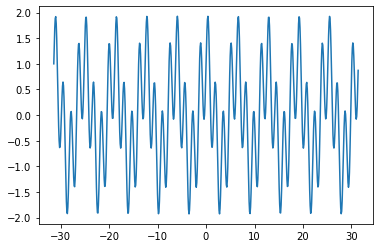

In [20]:
dt=0.1
x=np.arange(-10*np.pi,+10*np.pi,dt)
y=np.cos(x)+np.sin(4*x)
plt.plot(x,y)
plt.show()

In [21]:
### 2. calculate variance
v0=np.var(y)
print('variance of y is '+str(round(v0,3)))

variance of y is 1.0


In [22]:
### 3. perform FFT of y, Calculate variance in frequency domain. Confirm Perseval's theorem
N=np.size(x)
print('there are '+str(N)+' data points')
yhat=np.fft.fft(y)

there are 629 data points


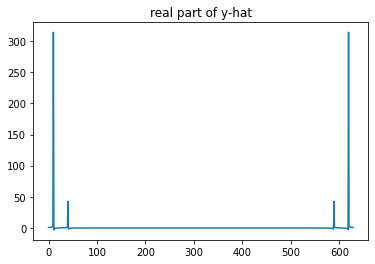

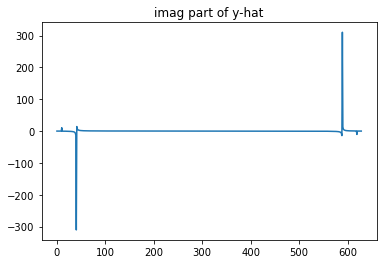

In [23]:
# let's look at the yhat itself first: real part
plt.plot(yhat.real)
plt.title('real part of y-hat')
plt.show()
# let's look at the yhat itself first: imaginary part
plt.plot(yhat.imag)
plt.title('imag part of y-hat')
plt.show()

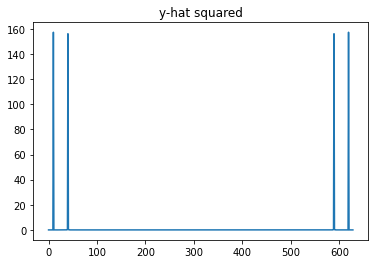

variance of yhat is 1.0


In [24]:
# let's look at the amplitude 
yhat2=yhat*np.conj(yhat)/N
plt.plot(yhat2.real)
plt.title('y-hat squared')
plt.show()
# Calculate variance in frequency domain. Confirm Perseval's theorem
v1=np.sum(yhat2.real)/N
print('variance based on yhat is '+str(round(v1,3)))

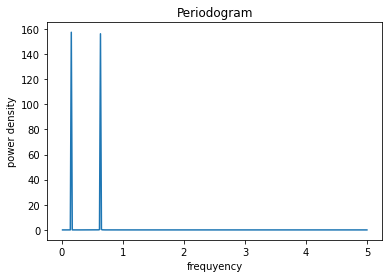

In [25]:
### 4. plot PSD (periodogram)
freq0=1/N
freq=np.arange(freq0,1/2,freq0)*1/dt
PSD=yhat2[1:int((N-1)/2+1)]
plt.plot(freq,PSD.real);
plt.xlabel('frequyency')
plt.ylabel('power density')
plt.title('Periodogram')
plt.show()

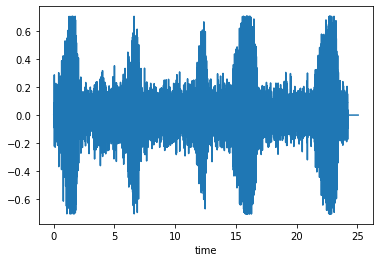

In [26]:
### 5. read in audio data
fs=44100
bw=np.genfromtxt('DATA/blue_whale_44100.tsv')
bw1=bw[:,0]
N=np.size(bw1)
time=np.linspace(0,N/fs,N)
plt.plot(time,bw1)
plt.xlabel('time')
plt.show()

In [27]:
### 6. perform the FFT
bwhat=np.fft.fft(bw1)

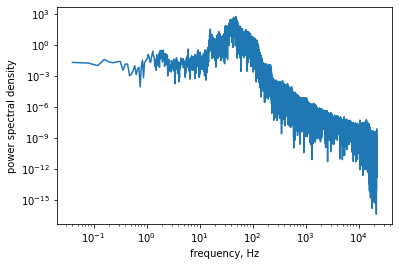

In [28]:
### 7. Plot the periodogram
freq=np.arange(fs/N,fs/2,fs/N)
psd=bwhat*np.conj(bwhat)/N
plt.loglog(freq,2*psd[1:int((N+1)/2)].real)
plt.xlabel('frequency, Hz')
plt.ylabel('power spectral density')
plt.show()

Text(0, 0.5, 'Nino3.4 SST index')

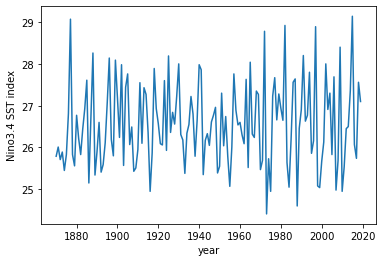

In [29]:
### 8. Analyze index of El-Nino events
nino=np.genfromtxt('nino34_1870_2019.tsv',delimiter='\t')
yr=nino[:,0]
jan=nino[:,12]
plt.plot(yr,jan)
plt.xlabel('year')
plt.ylabel('Nino3.4 SST index')

In [30]:
### 9. Analyze in frequency domain using FFT
N=np.size(jan)
jhat=np.fft.fft(jan)#-E@avec)
freq=np.arange(1/N,1/2,1/N)

In [31]:
### 10. calculate PSD and plot it
psd=jhat*np.conj(jhat)/N
PSD=2*psd[1:int(N/2)]

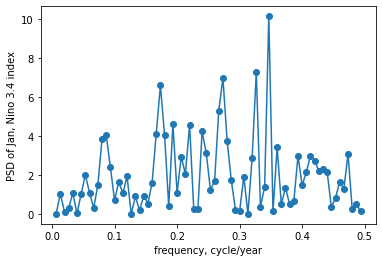

In [32]:
plt.plot(freq,PSD.real,'o-')
plt.xlabel('frequency, cycle/year')
plt.ylabel('PSD of Jan, Nino 3.4 index')
plt.show()